## Maria Harrison
### CS 8395-53 - Advanced Quantum Computing
#### Final Project: Bernstein Vazirani Algorithm Implementation and Application

In [1]:
from __future__ import print_function
import numpy as np
import sys
import random
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram

### Part 1: Using Bernstein Vazirani Algorithm to guess a simple binary string
##### This section is intended to display foundational concepts of Bernstein Vazirani using quantum circuits

In [2]:
def getRandomNumberHigh():
    decimal_num = random.randint(1, 1000)
    print("Random number HIGH generated in decimal format:", decimal_num)
    print("Random number in BINARY format:", bin(decimal_num).replace("0b", ""))
    return decimal_num

def getRandomNumberQubits():
    n_qub = random.randint(1, 39)
    print("Random number of qubits:", n_qub)
    return n_qub

In [3]:
r = getRandomNumberHigh()
n_qubits = getRandomNumberQubits()


Random number HIGH generated in decimal format: 864
Random number in BINARY format: 1101100000
Random number of qubits: 12


In [4]:
# sanitation check that the hidden number can be represented with n number of qubits
secret_num = r %2**(n_qubits)

In [5]:
'''
    create a quantum circuit to implelemtn bernstein vazirani algorithm
    
    parameters
        oracle: quantum circuit
        n: length of secret string

    return
       bernstein vazirani algorithm as a quantum circ

'''
def bernstein_vazirani_alg(r, n):
    qr = QuantumRegister(n+1)
    cr = ClassicalRegister(n)
    bvCirq = QuantumCircuit(qr, cr, name ="BernsteinVazirani")
    
    # setting output x gate qubits
    bvCirq.x(n)
    
    # setting output h gate qubits
    bvCirq.h(n)
    
    # set up input register and setting h gate
    for qubit in range(n):
        bvCirq.h(qubit)
        
    bvCirq.barrier()
    
    # add return from oracle() func to circuit
    # bvCirq.append(oracle, range(n+1))
    for i in range(n):
        if (r & (1 <<i)):
            bvCirq.z(qr[i])
        else:
            bvCirq.id(qr[i])
            
    bvCirq.barrier()
    
    # set h gates again before measuring
    for q in range(n):
        bvCirq.h(qr[q])
    
    # measure perforamnce
    for i in range(n):
        bvCirq.measure(i, i)
    
    return bvCirq

In [6]:
#Return Oracle Circuit
qCirc = bernstein_vazirani_alg(secret_num, n_qubits)

/opt/homebrew/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


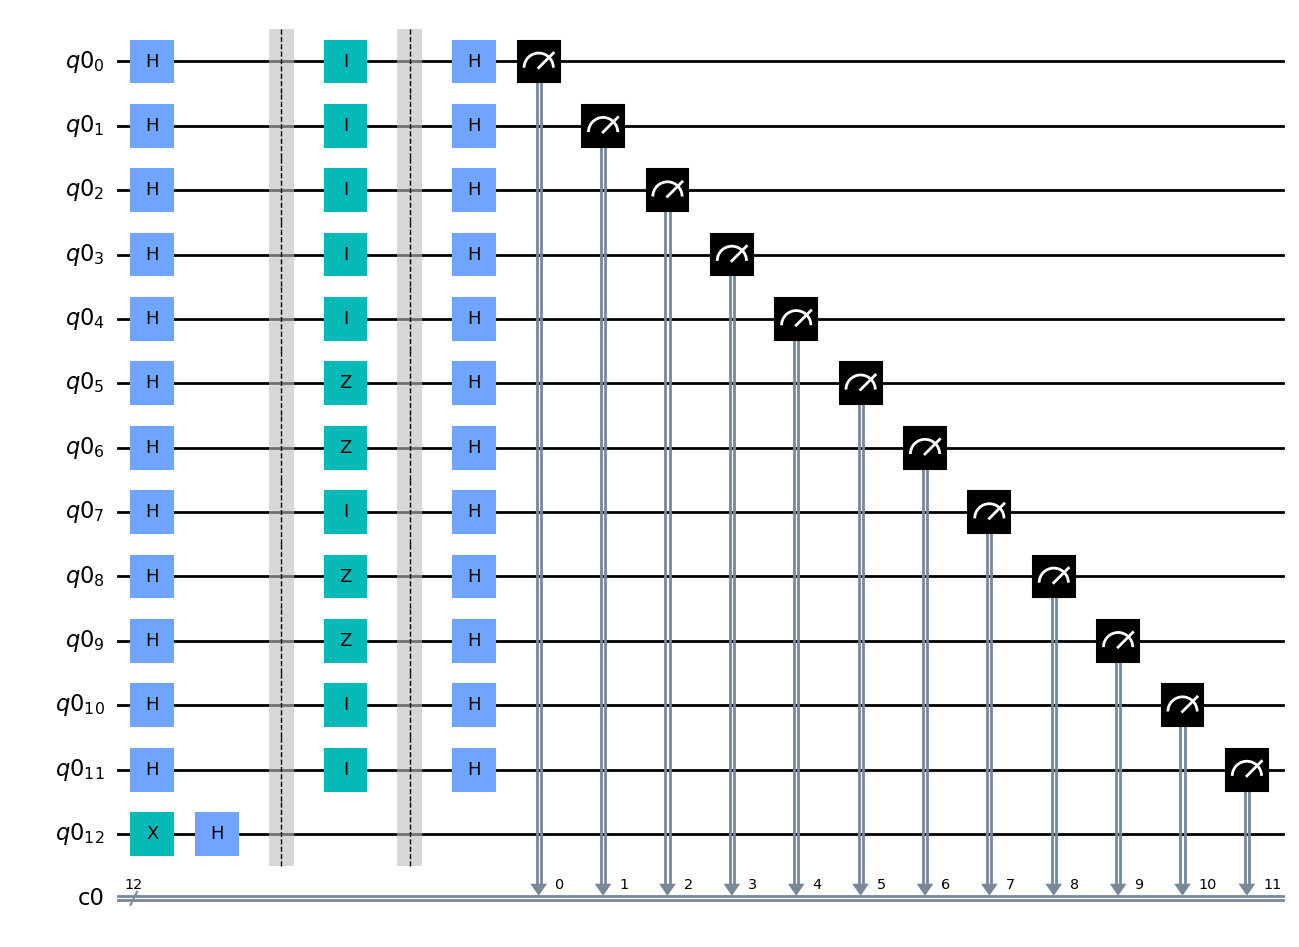

In [7]:

qCirc.draw('mpl')

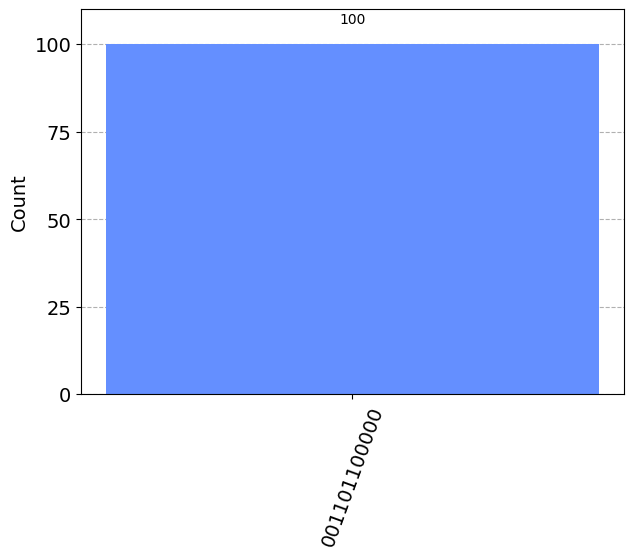

In [8]:
''' 
    Running Bernstein Vazirani Algorithm
'''
# creating quantum simulator 
simulator = Aer.get_backend('qasm_simulator')
shots = 100
# running quantum circuit on simulator and calling .result() to get results of circuit when it runs
result = execute(qCirc, backend=simulator, shots=shots).result()

#printing histogram result
plot_histogram(result.get_counts(qCirc))


In [9]:
guess = list(result.get_counts().keys())
print(guess)

['001101100000']


In [10]:
def isGuessCorrect(secret_num, guess):
    if (format(guess == secret_num)):
        print("Yay, the guess was CORRECT!")
    else:
        print("Sorry, the guess was NOT correct :(")

In [11]:
def printOutputAndScore(r, guess, secret_num):
    print("Random number generated at the beginning and converted to secret string :", r)
    print("Secret string:", secret_num)
    print("Guess:", guess)

    isGuessCorrect(secret_num, guess)
    
printOutputAndScore(r, guess, secret_num)

Random number generated at the beginning and converted to secret string : 864
Secret string: 864
Guess: ['001101100000']
Yay, the guess was CORRECT!


## Part 2: Using Bernstein Vazirani Algorithm to guess an encrypted randomly generated message
##### This section is intended to further build the concepts of Bernstein Vazirani algorithm and provide a simple cryptographic application

In [12]:
import wonderwords
from wonderwords import RandomSentence
import rsa 
from rsa import *
from cryptography.fernet import Fernet


In [13]:
sentences = []

In [14]:
'''
    Function to generate a random sentence consisting of: subject, preicate, adjective, and direct object.
'''
def generateSentence():
    
    s = RandomSentence()

    # generating a random sentence
    s1 = s.sentence()
    print(s1)
    return s1

In [15]:
'''
    Function to generate a random message of full sentences
    
    parameters: 
        s_numb: the desired number of sentences the message should have
    
    Each sentence generated will have: subject, preicate, adjective, and direct object.
'''
def generateMessage(s_numb):
    for i in range(s_numb):
        r_sentence = generateSentence()
        sentences.append(r_sentence)
    return sentences

In [16]:
count = 4
random_msg = generateMessage(count)
print(random_msg)

The gamy beech realizes round.
The ossified cauliflower dries skunk.
The spicy bustle navigates sanction.
The good lacquerware assists divalent.
['The gamy beech realizes round.', 'The ossified cauliflower dries skunk.', 'The spicy bustle navigates sanction.', 'The good lacquerware assists divalent.']


In [17]:
message = ' '.join(random_msg)
print(message)

The gamy beech realizes round. The ossified cauliflower dries skunk. The spicy bustle navigates sanction. The good lacquerware assists divalent.


In [18]:
def printEncryption(original, encrypt, decrypt):
    print("Original message before encryption")
    print("-----------------------------------")
    print(original)
    print("\n")
    print("Encrypted message after encrypting")
    print("-----------------------------------")
    print(encrypt)
    print("\n")
    print("Decrypted message after decrypting")
    print("-----------------------------------")
    print(decrypt)

In [19]:
''' 
    Encrypting Message using Fernet
'''
def fernet_encryption(message):
    #generate key for encryption using fernet
    fernet_key = Fernet.generate_key()
    
    fernet = Fernet(fernet_key)
    
    #encrypt the string, but message has to be encoded to byte string first
    fern_encrypt = fernet.encrypt(message.encode())
    fern_decrypt = fernet.decrypt(fern_encrypt).decode()
    print("Fernet Encryption")
    print("#################")
    print("\n")
    printEncryption(message, fern_encrypt, fern_decrypt)
    return fernet_key

In [20]:
fernet = fernet_encryption(message)

Fernet Encryption
#################


Original message before encryption
-----------------------------------
The gamy beech realizes round. The ossified cauliflower dries skunk. The spicy bustle navigates sanction. The good lacquerware assists divalent.


Encrypted message after encrypting
-----------------------------------
b'gAAAAABlarFQ5U6srQgi9uUMl2c_NGEb2kdyTwlSuKklhP0EQAPYG8B_hD5BwqG3v8uT92NVVLNcYtM6iuBfeGJuGgRs7CLYALTagt_ltjTqUD_-0qW-t7HTZJ4dZ44fd8HoXSqBHe6mjb3mNYJDMqHcC0vyoMZWVNHTTwksoM9oyI7b4CZjMCpeib0Up5095r0znGvuJCjt1TOA2UnMHlLXMAwZ6ccCsCVxF2bAW_snKsYiW5rtq0-RyqOczdSTqF48CelLQ3lwIDzaXkGkwz7pjQanc17kaw=='


Decrypted message after decrypting
-----------------------------------
The gamy beech realizes round. The ossified cauliflower dries skunk. The spicy bustle navigates sanction. The good lacquerware assists divalent.


In [21]:
print("Fernet key encrypted: ", fernet)

Fernet key encrypted:  b'n1QbDGJxjXLzv5od6XZEi0nQN9CrJAqBhPbNqYLe3ys='


In [22]:
import binascii

#fernet key is a base64 encoded 32byte key
print("Encrypted Key in Base64:")
print(fernet)
print("\n")    

b64_ascii = fernet.decode("ascii")
print("Key of Base64 -> decoded in ASCII")
print(b64_ascii)
print("\n")
    
b64_binary = binascii.a2b_base64(b64_ascii)
print("Converting key of B64 -> Binary Array")
print(b64_binary)
print("\n")

print("Converting key of binary array -> bytes")
bits = ''.join(format(byte, '08b') for byte in b64_binary)
print(bits)
print("\n")

print("Converting key of binary bytes -> decimal")
converted =[b for b in b64_binary]
print(converted)
print("\n")

print("Sorted number of ints from converted Base64 key")
converted.sort()
print(converted)



Encrypted Key in Base64:
b'n1QbDGJxjXLzv5od6XZEi0nQN9CrJAqBhPbNqYLe3ys='


Key of Base64 -> decoded in ASCII
n1QbDGJxjXLzv5od6XZEi0nQN9CrJAqBhPbNqYLe3ys=


Converting key of B64 -> Binary Array
b'\x9fT\x1b\x0cbq\x8dr\xf3\xbf\x9a\x1d\xe9vD\x8bI\xd07\xd0\xab$\n\x81\x84\xf6\xcd\xa9\x82\xde\xdf+'


Converting key of binary array -> bytes
1001111101010100000110110000110001100010011100011000110101110010111100111011111110011010000111011110100101110110010001001000101101001001110100000011011111010000101010110010010000001010100000011000010011110110110011011010100110000010110111101101111100101011


Converting key of binary bytes -> decimal
[159, 84, 27, 12, 98, 113, 141, 114, 243, 191, 154, 29, 233, 118, 68, 139, 73, 208, 55, 208, 171, 36, 10, 129, 132, 246, 205, 169, 130, 222, 223, 43]


Sorted number of ints from converted Base64 key
[10, 12, 27, 29, 36, 43, 55, 68, 73, 84, 98, 113, 114, 118, 129, 130, 132, 139, 141, 154, 159, 169, 171, 191, 205, 208, 208, 222, 223, 233, 243, 246]


In [23]:
def getRandNumFernet(converted):
    rf = random.choice(converted)
    nqb = random.randint(3, 39)
    
    print("Random number from Fernet Base64 key in decimal format:", rf)
    print("Random number in BINARY format:", bin(rf).replace("0b", ""))
    print("Random number of qubits:", nqb)
    return rf, nqb

   

In [24]:
# sanitation check that the hidden number can be represented with n number of qubits
rf, nqb = getRandNumFernet(converted)
if (rf%2 ** (nqb)):
    print("PASS")
    rf_secret = bin(rf).replace("0b", "")
    pass
else:
    print(rf%2 ** (nqb))


Random number from Fernet Base64 key in decimal format: 84
Random number in BINARY format: 1010100
Random number of qubits: 15
PASS


In [25]:
#Return Oracle Circuit

qcFernet = bernstein_vazirani_alg(rf, nqb)

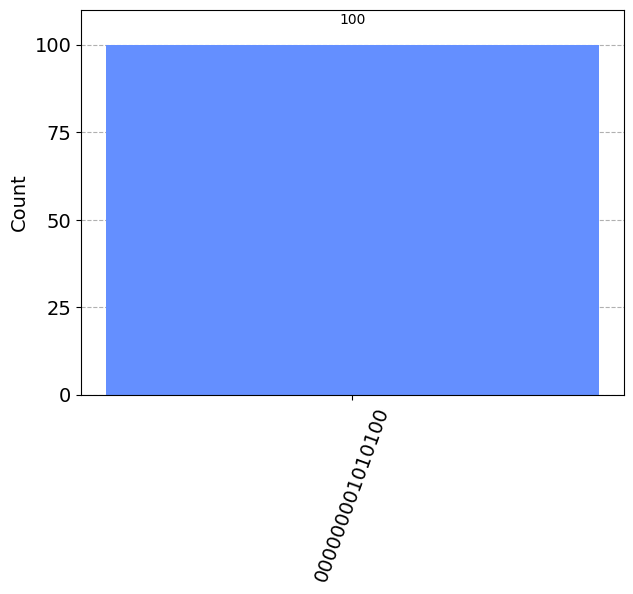

In [26]:
from qiskit import providers

''' 
    Running Bernstein Vazirani Algorithm on Fernet Key
'''
# creating quantum simulator 
fernet_sim = Aer.get_backend('qasm_simulator')

# running quantum circuit on simulator and calling .result() to get results of circuit when it runs
fernet_result = execute(qcFernet, backend=fernet_sim, shots=100).result()

#printing histogram result
plot_histogram(fernet_result.get_counts(qcFernet))

In [53]:
fernet_guess = list(fernet_result.get_counts().keys())
print(format(fernet_guess))

['000000001010100']


In [76]:
def convertBackToBase64(guess):
    print("Fernet Guess in Binary")
    print(guess)
    print("\n")
    
    print("Converting Guess of binary bits -> decimal")
    bytes_bits = int(guess[0], 2)
    # bytes_bits = int(guess, 2)
    print(bytes_bits)
    print("\n")


In [77]:
convertBackToBase64(fernet_guess)


Fernet Guess in Binary
['000000001010100']


Converting Guess of binary bits -> decimal
84




In [78]:
printOutputAndScore(rf, format(fernet_guess), rf_secret)

Random number generated at the beginning and converted to secret string : 84
Secret string: 1010100
Guess: ['000000001010100']
Yay, the guess was CORRECT!
